# Time Series Analysis

A *time series* is a form of data consisting of the values of a function sampled across different points in time. Most commonly, this series is a sequence taken at equally spaced points in time, where each point is called an *observation*. In this notebook we look at working with a time series in the form of a Pandas DataFrame.

In [225]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pylab as plt
%matplotlib inline 

## Time Series in Pandas

The most basic kind of time series data in Pandas is a Series indexed by timestamps, which is often represented as Python strings or datetime values. 


To start off, we will create a simple time series based on a list of values and a corresponding list of dates. These will represent the *observations* in our series.

In [226]:
# generate a set of dates and values
dates = []
values = []
for i in range(20):
    dates.append(datetime(2023, 10, i+1))
    # create a pattern in the values
    if i < 14:
        value = 5 + i
    else:
        value = 5 + (2*(20-i))
    values.append(value)

We will turn this into a Pandas Series, where the list of dates will become the index of the Series:

In [227]:
ts = pd.Series(values, index=dates)
ts

2023-10-01     5
2023-10-02     6
2023-10-03     7
2023-10-04     8
2023-10-05     9
2023-10-06    10
2023-10-07    11
2023-10-08    12
2023-10-09    13
2023-10-10    14
2023-10-11    15
2023-10-12    16
2023-10-13    17
2023-10-14    18
2023-10-15    17
2023-10-16    15
2023-10-17    13
2023-10-18    11
2023-10-19     9
2023-10-20     7
dtype: int64

Typically we will visualise this using a line plot:

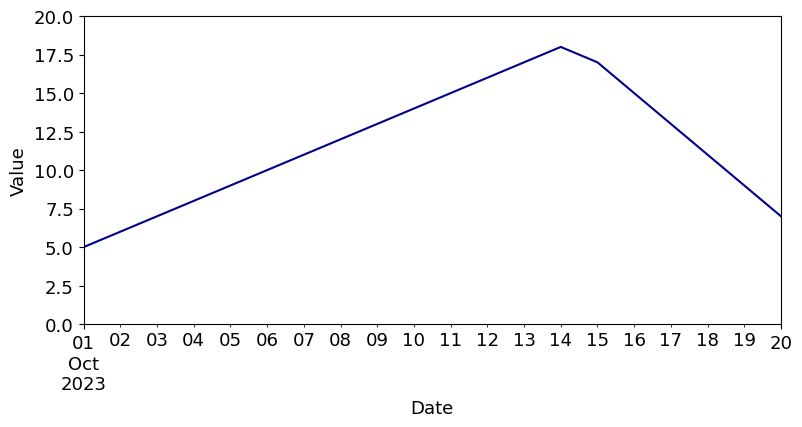

In [228]:
# generate a plot
p = ts.plot(figsize=(9, 4), fontsize=13, color="darkblue")
# customise the plot
p.set_ylim(0, 20)
p.set_xlabel("Date", fontsize=13)
p.set_ylabel("Value", fontsize=13)
plt.show()

A Pandas time series can be indexed and sliced in the same way as a normal Series. However, if we have a date type as an index for the series, we can do indexing and slicing based on specifying different dates. For exmaple:

In [229]:
ts["2023-10-06"]

10

In [230]:
ts["2023-10-04":"2023-10-06"]

2023-10-04     8
2023-10-05     9
2023-10-06    10
dtype: int64

In [231]:
ts["2023-10-12":]

2023-10-12    16
2023-10-13    17
2023-10-14    18
2023-10-15    17
2023-10-16    15
2023-10-17    13
2023-10-18    11
2023-10-19     9
2023-10-20     7
dtype: int64

For longer time series, we can easily select slices of data for a specific month or year: 

In [232]:
# create random series with 500 values using NumPy
lts = pd.Series(np.random.randn(500), index=pd.date_range('1/1/2021', periods=500))
print(lts.head())
print(lts.tail())

2021-01-01   -2.778346
2021-01-02   -0.502778
2021-01-03   -1.177097
2021-01-04   -1.273504
2021-01-05    0.764552
Freq: D, dtype: float64
2022-05-11    0.274336
2022-05-12   -0.247519
2022-05-13   -0.250274
2022-05-14    0.261978
2022-05-15    0.691262
Freq: D, dtype: float64


In [233]:
lts["2022"].head()

2022-01-01    0.087428
2022-01-02    0.778850
2022-01-03   -1.010070
2022-01-04   -0.034901
2022-01-05    0.404866
Freq: D, dtype: float64

In [234]:
lts["2022-03"].head()

2022-03-01    0.654105
2022-03-02    0.885663
2022-03-03   -0.857075
2022-03-04    0.401892
2022-03-05   -0.234936
Freq: D, dtype: float64

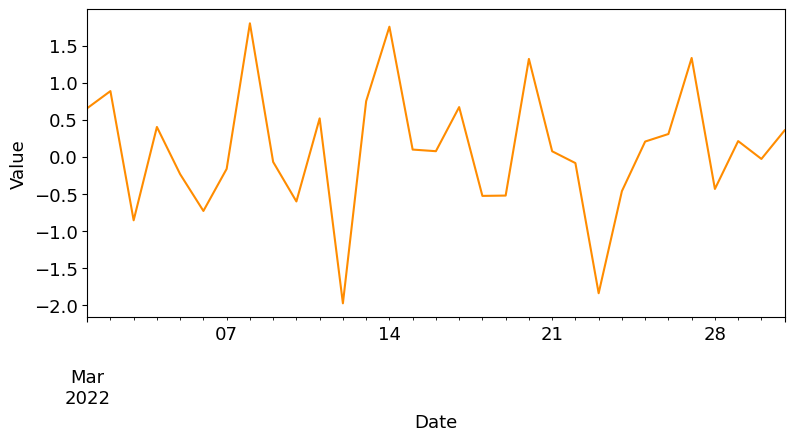

In [235]:
# plot the series for a single month
p = lts["2022-03"].plot(figsize=(9, 4), fontsize=13, color="darkorange")
# customise the plot
p.set_xlabel("Date", fontsize=13)
p.set_ylabel("Value", fontsize=13)
plt.show()

Time series data is ordered chronologically, so we can slice with timestamps not contained in a time series:

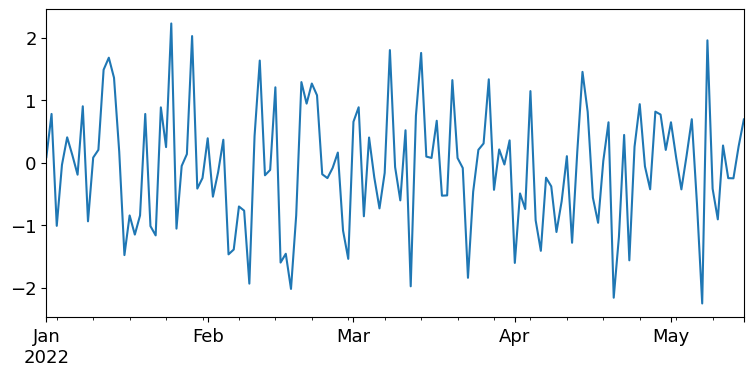

In [236]:
p = lts["2022-01":"2023-03"].plot(figsize=(9, 4),fontsize=13)
plt.show()

*Resampling* is the process of converting time series data from one frequency to another. This is done via the resample() function.

We can downsample - aggregate higher frequency data to a lower frequency:

In [237]:
ts = pd.Series(np.random.randn(100), index=pd.date_range('1/1/2015', periods=100))
ts.head()

2015-01-01    0.429721
2015-01-02    0.286444
2015-01-03    0.397025
2015-01-04   -0.870092
2015-01-05    1.270695
Freq: D, dtype: float64

In [238]:
# Convert from day frequency to month (M) frequency, by averaging values
ts_monthly = ts.resample("M").mean()
ts_monthly.head()

/var/folders/4j/3w98pmcj1qb9m2ysc0djsvnc0000gn/T/ipykernel_19718/3971522205.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts_monthly = ts.resample("M").mean()


2015-01-31    0.143653
2015-02-28    0.203361
2015-03-31   -0.245555
2015-04-30   -0.037553
Freq: ME, dtype: float64

We can also upsample a time series, converting lower frequency to higher frequency data.

In [239]:
ts = pd.Series(np.random.randn(5), index=pd.date_range('1/1/2015', periods=5))
ts

2015-01-01   -0.297948
2015-01-02   -0.278160
2015-01-03   -0.179680
2015-01-04    0.303352
2015-01-05   -1.323475
Freq: D, dtype: float64

For example, we could upsample by hour (H). Note that the rows that are added in between have missing values (NaNs).

In [240]:
ts_hourly = ts.resample('H').mean()
ts_hourly.head()

/var/folders/4j/3w98pmcj1qb9m2ysc0djsvnc0000gn/T/ipykernel_19718/831892722.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  ts_hourly = ts.resample('H').mean()


2015-01-01 00:00:00   -0.297948
2015-01-01 01:00:00         NaN
2015-01-01 02:00:00         NaN
2015-01-01 03:00:00         NaN
2015-01-01 04:00:00         NaN
Freq: h, dtype: float64

## Comparing Time Series

For some types of data we might have multiple time series that we want to compare over time (e.g. to see whether the series exhibit similar or different trends).

To demonstrate this, we will use an agricultural meat dataset (originally from the **ggplot** Python package). This dataset contains figures for livestock, dairy, and poultry production in the US over several decades.

We will load this data from a remote CSV file into a Pandas DataFrame:

In [241]:
# note that we specify parse_dates to try to parse the index field (called "date") as a date.
df = pd.read_csv("http://mlg.ucd.ie/modules/COMP41680/agri-meat.csv", index_col="date", parse_dates=True)

We see that this dataset has one entry per month, from 1944 to 2012:

In [242]:
df.head()

,beef,veal,pork,lamb
date,,,,
1944-01-01,751.0,85.0,1280.0,89.0
1944-02-01,713.0,77.0,1169.0,72.0
1944-03-01,741.0,90.0,1128.0,75.0
1944-04-01,650.0,89.0,978.0,66.0
1944-05-01,681.0,106.0,1029.0,78.0


In [243]:
df.tail()

,beef,veal,pork,lamb
date,,,,
2012-07-01,2200.8,9.5,1721.8,12.5
2012-08-01,2367.5,10.1,1997.9,14.2
2012-09-01,2016.0,8.8,1911.0,12.5
2012-10-01,2343.7,10.3,2210.4,14.2
2012-11-01,2206.6,10.1,2078.7,12.4


We can produce a simple time series plot for the full dataset:

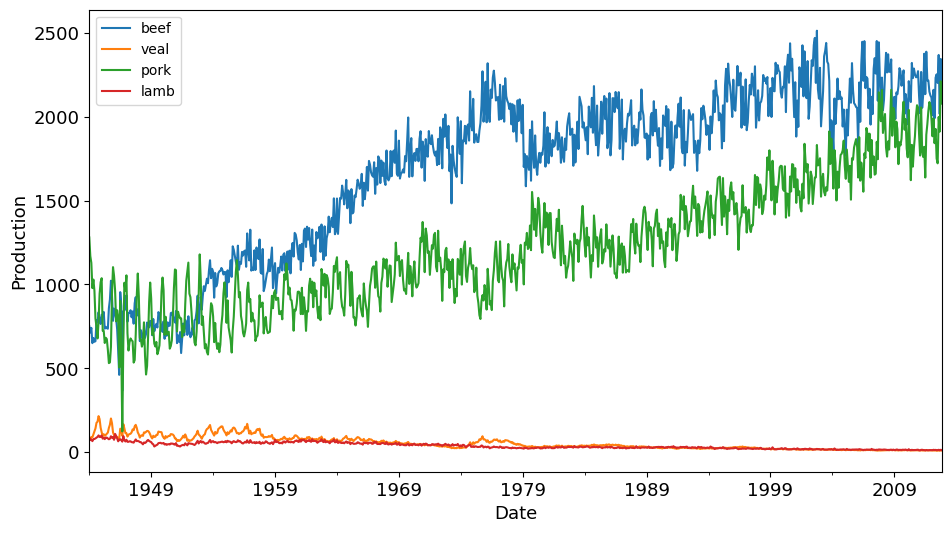

In [244]:
p = df.plot(figsize=(11, 6), fontsize=13)
p.set_xlabel("Date",fontsize=13)
p.set_ylabel("Production",fontsize=13)
plt.show()

We can also produce a plot for a specific time period:

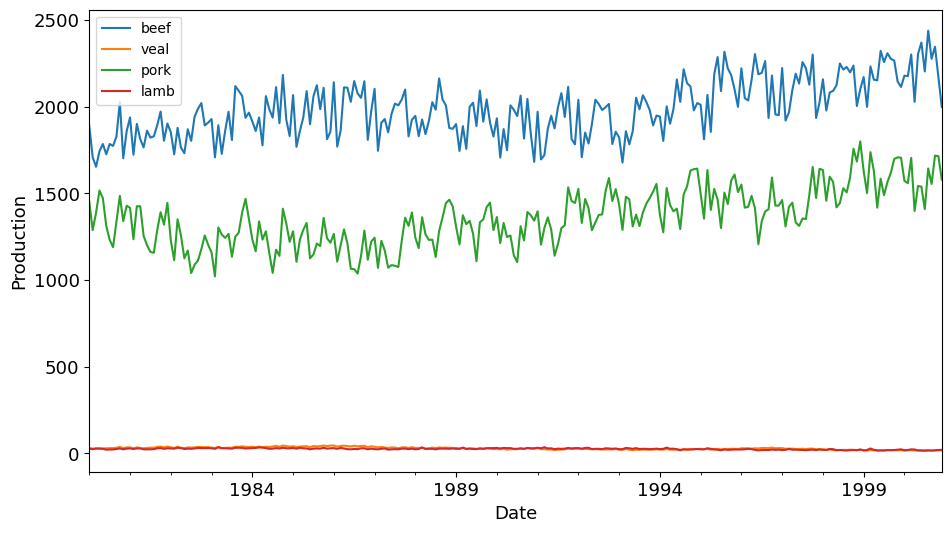

In [245]:
# Only plot data from 1980 to 2000
p = df["1980":"2000"].plot(figsize=(11, 6), fontsize=13)
p.set_xlabel("Date",fontsize=13)
p.set_ylabel("Production",fontsize=13)
plt.show()

We can also look at a shorter time period, such as the months in a single year:

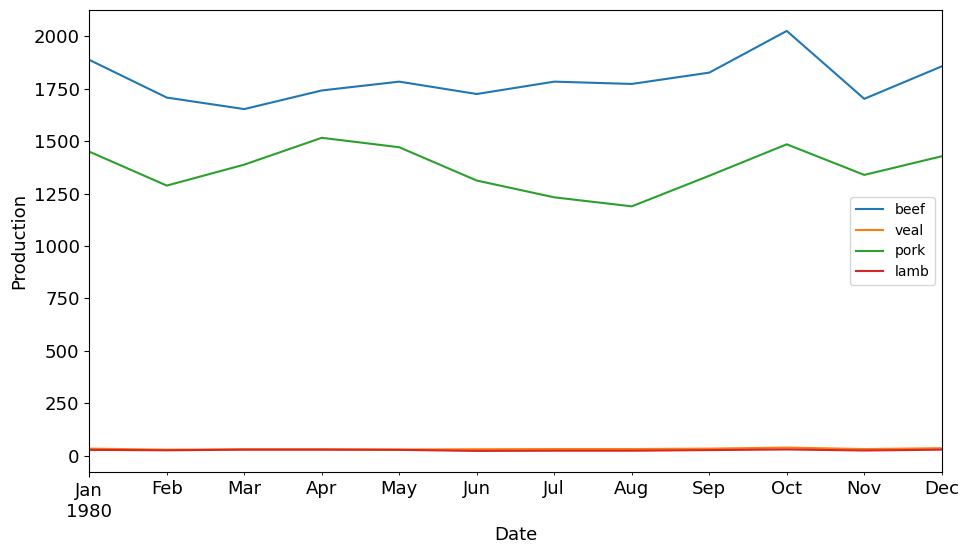

In [246]:
p = df["1980-1":"1980-12"].plot(figsize=(11, 6), fontsize=13)
p.set_xlabel("Date",fontsize=13)
p.set_ylabel("Production",fontsize=13)
plt.show()

Pandas has functionality for aggregating date and time based data. For example, we can group the data by year:

In [247]:
# aggregate the sum of values for each year
df_year = df.groupby(df.index.year).sum()
df_year.head()

,beef,veal,pork,lamb
date,,,,
1944,8801.0,1629.0,11502.0,1001.0
1945,9936.0,1552.0,8843.0,1030.0
1946,9010.0,1329.0,9220.0,946.0
1947,10096.0,1493.0,8811.0,779.0
1948,8766.0,1323.0,8486.0,728.0


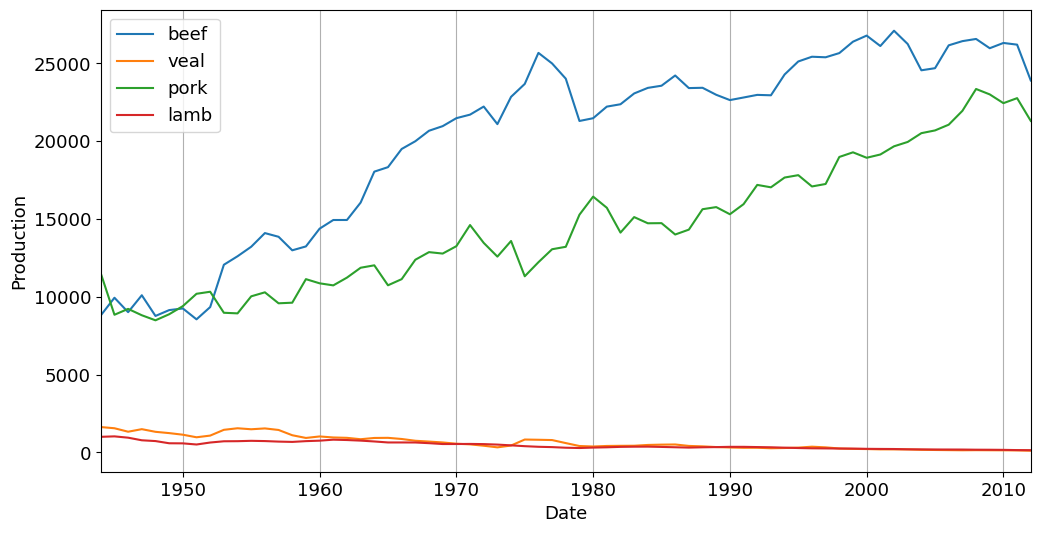

In [248]:
p = df_year.plot(figsize=(12, 6), fontsize=13)
p.set_xlabel("Date",fontsize=13)
p.set_ylabel("Production",fontsize=13)
p.set_xlim(df_year.index.min(), df_year.index.max())
p.legend(fontsize=13)
p.xaxis.grid()
plt.show()

If we want to group the data by decade, we need to define a custom aggregation function which will take the year of a date and "floor" it - i.e. round it down to the nearest 10. So 1957 becomes 1950 etc.

In [249]:
def to_decade(date_value):
    return (date_value.year // 10) * 10

In [250]:
df_decade = df.groupby(to_decade).sum()

In [251]:
df_decade

,beef,veal,pork,lamb
date,,,,
1940,55751.0,8566.0,55737.0,5071.0
1950,119161.0,12693.0,98450.0,6724.0
1960,177754.0,8577.0,116587.0,6873.0
1970,228947.0,5713.0,132539.0,4256.0
1980,230100.0,4278.0,150528.0,3394.0
1990,243579.0,2938.0,173519.0,2986.0
2000,260540.7,1685.3,208211.3,1964.7
2010,76391.5,371.9,66491.2,455.6


Let's plot a comparison of production across the decades:

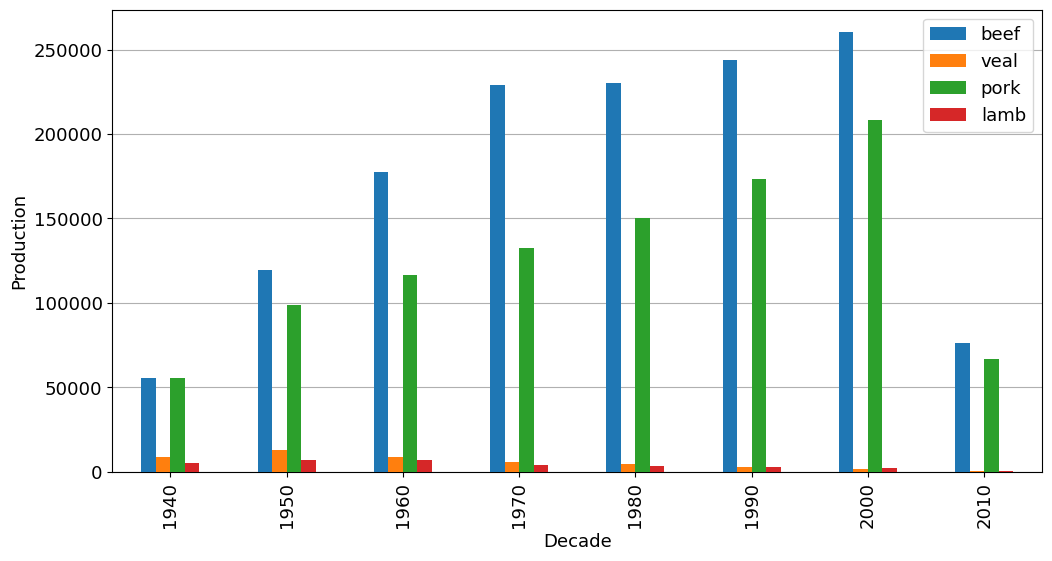

In [252]:
p = df_decade.plot(kind='bar',figsize=(12, 6), fontsize=13, zorder=3)
p.set_xlabel("Decade",fontsize=13)
p.set_ylabel("Production",fontsize=13)
p.legend(fontsize=13)
p.yaxis.grid()
plt.show()

We could also use stacked bars to look at total production volume per decade:

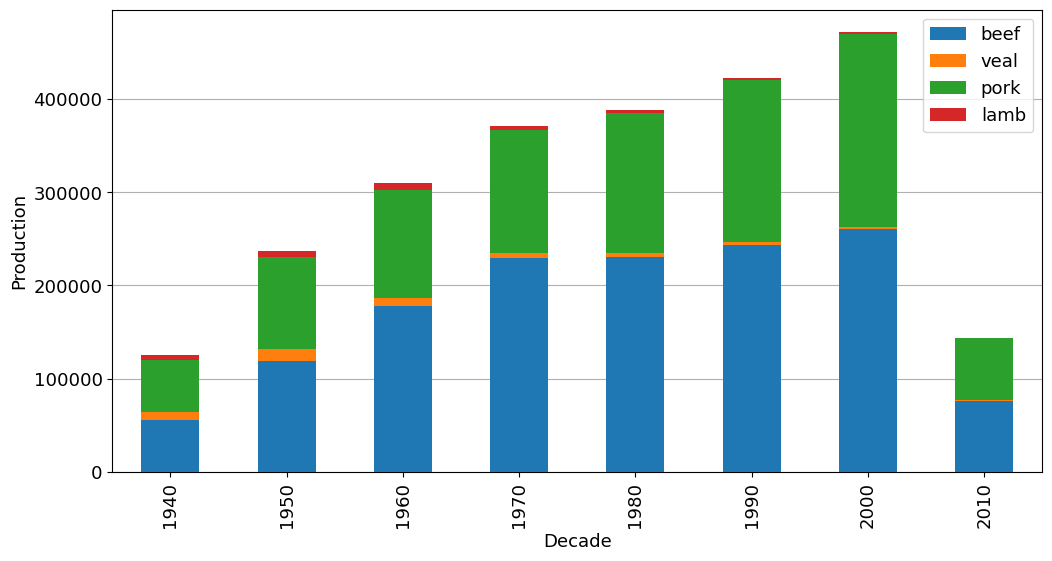

In [253]:
p = df_decade.plot(kind='bar',figsize=(12, 6), fontsize=13, stacked=True, zorder=3)
p.set_xlabel("Decade",fontsize=13)
p.set_ylabel("Production",fontsize=13)
p.legend(fontsize=13)
p.yaxis.grid()
plt.show()

## Moving Averages

One way to extract a trend from a time series is to use a moving average. This divides the series into overlapping regions, called windows, and computes the average of the values in each window.

A *rolling mean* is a simple approach which computes the mean of the values in each window. The size of the window is the number of values it will include. Pandas provides a rolling_mean() function, which takes a Series and a window size and returns a new Series.

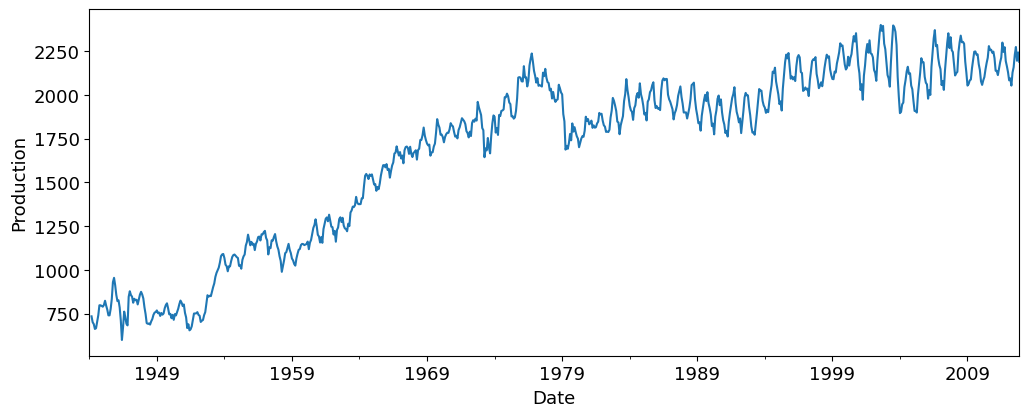

In [254]:
# calculate and plot 3 year rolling mean beef production
rm = df["beef"].rolling(3).mean()
p = rm.plot(figsize=(12, 4.5), fontsize=13)
p.set_xlabel("Date",fontsize=13)
p.set_ylabel("Production",fontsize=13)
plt.show()

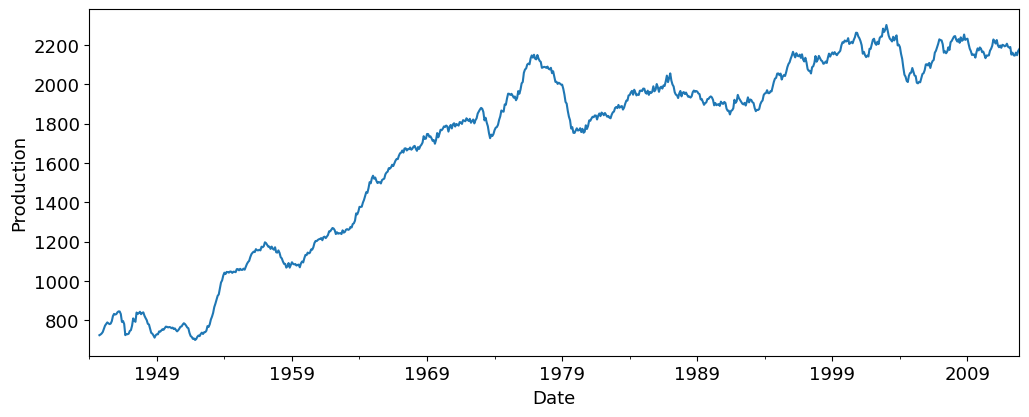

In [255]:
# calculate and plot 10 year rolling mean beef production
rm = df["beef"].rolling(10).mean()
p = rm.plot(figsize=(12, 4.5), fontsize=13)
p.set_xlabel("Date",fontsize=13)
p.set_ylabel("Production",fontsize=13)
plt.show()

Increasing the window size produces a smoother plot, with less noisy. But be careful not to "over-smooth" the data:

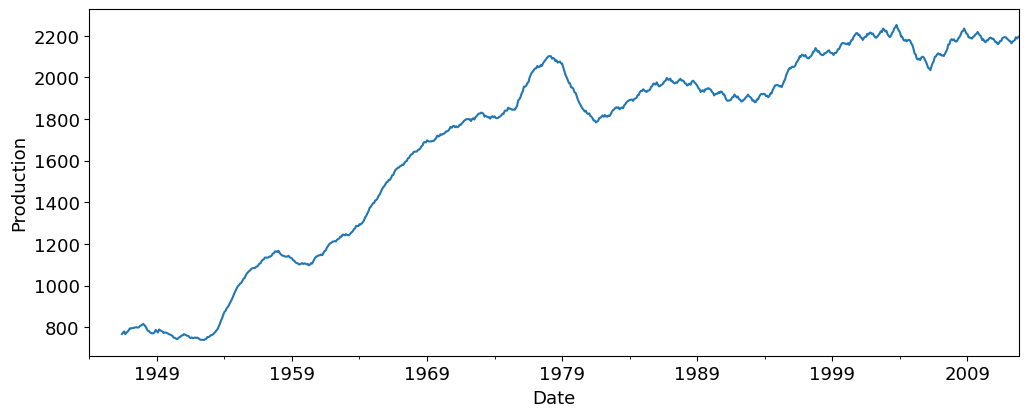

In [256]:
# calculate and plot 30 year rolling mean beef production
rm = df["beef"].rolling(30).mean()
p = rm.plot(figsize=(12, 4.5), fontsize=13)
p.set_xlabel("Date",fontsize=13)
p.set_ylabel("Production",fontsize=13)
plt.show()